#### Imports

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.feature_selection import RFE

#### Retrieve Stored Variables
Standard dataset

In [2]:
%store -r data_levels

#### Variable That Removes Class Variable and ID from Dataset

In [3]:
clean = list(set(list(data_levels)) - set(['default_payment_next_month', 'id']))

#### Seperate Dataset into Training and Testing Subsets
70/30 split will be used

In [4]:
std_x_train, std_x_test, std_y_train, std_y_test = train_test_split(data_levels[clean], 
                                                                    data_levels['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Instantiate Decision Tree Model Object

In [5]:
model = KNeighborsClassifier()

#### Train the Model on the Training Data and Use it to Predict Y Values of Test Set
Include the time taken

In [6]:
start = time.time()
model.fit(X = std_x_train,
          y = std_y_train)
results = confusion_matrix(y_pred = model.predict(std_x_test),
                           y_true = std_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 8.51 seconds to train and predict.


#### Display Confusion Matrix

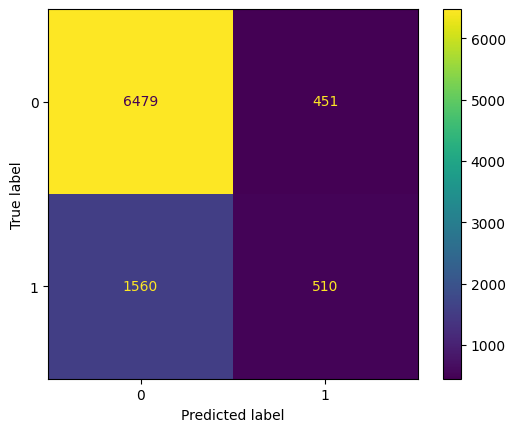

In [7]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate the Model Using Custom Eval Metrics Class

In [8]:
metrics = evaluation.evalMetrics(results)

In [9]:
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.777
The Precision of the Model: 0.81
The Recall of the Model: 0.93
The F-Score of the Model: 0.87
The Negative Predictive Value  of the Model: 0.53
The Positive Predicitive Value of the Model: 0.81


#### Cross Validate the Model Using Accuracy

In [10]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=71)
cv_scores = cross_val_score(model, data_levels[clean], data_levels['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()

#### CV Scores, Min and Max

In [11]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.78966667 0.78233333 0.78633333 0.78066667 0.78366667 0.78166667
 0.793      0.78833333 0.784      0.76666667 0.782      0.79466667
 0.78433333 0.792      0.789      0.78433333 0.77366667 0.784
 0.78633333 0.79       0.78533333 0.79033333 0.773      0.78266667
 0.79533333 0.77433333 0.76266667 0.79133333 0.80466667 0.78533333]

Max Cross Validation Score:  0.8046666666666666
Min Cross Validation Score:  0.7626666666666667


#### Evaluate the Results of the Cross-Validation

In [12]:
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 117.47 seconds and produced an average accuracy of 0.785


#### Retrieve the Selected Features from the Random Forest Algorithm

In [13]:
%store -r selected_features

In [14]:
selected_features

['pay_0', 'pay_2', 'age', 'limit_bal', 'education']

#### Retrain Model on Selected Features and Evaluate Change in Performance

In [15]:
features_x_train, features_x_test, features_y_train, features_y_test = train_test_split(data_levels[selected_features], 
                                                                    data_levels['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=96)

#### Reinstantiate Model and Fit/Predict

In [16]:
model = KNeighborsClassifier()

In [17]:
start = time.time()
model.fit(X = features_x_train,
          y = features_y_train)
results = confusion_matrix(y_pred = model.predict(features_x_test),
                           y_true = features_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 1.34 seconds to train and predict.


#### Display CF

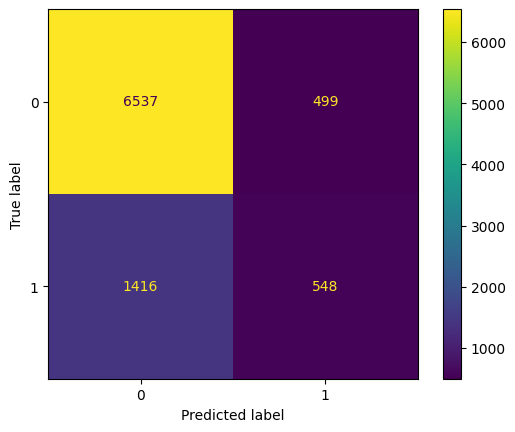

In [18]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate and Cross-Validate

In [19]:
metrics = evaluation.evalMetrics(results)
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.787
The Precision of the Model: 0.82
The Recall of the Model: 0.93
The F-Score of the Model: 0.87
The Negative Predictive Value  of the Model: 0.52
The Positive Predicitive Value of the Model: 0.82


In [20]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=17)
cv_scores = cross_val_score(model, data_levels[selected_features], data_levels['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 13.23 seconds and produced an average accuracy of 0.789


#### CV Scores, Min and Max

In [21]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.78166667 0.79733333 0.78666667 0.79033333 0.79433333 0.782
 0.792      0.76966667 0.789      0.78666667 0.79       0.78366667
 0.78366667 0.78566667 0.798      0.78666667 0.79433333 0.78666667
 0.78633333 0.79033333 0.78966667 0.79266667 0.782      0.78766667
 0.78466667 0.789      0.78366667 0.789      0.80566667 0.79633333]

Max Cross Validation Score:  0.8056666666666666
Min Cross Validation Score:  0.7696666666666667
